In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_branches=pd.read_csv('../input/marketing-data-for-a-supermarket-in-united-states/supermarket_marketing/50_SupermarketBranches.csv')

data_branches.head()

,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Data shape and description
print("Shape of data is: " + str(data_branches.shape))
print("\n")
print("Data discription is: ")
data_branches.describe()

Shape of data is: (50, 5)


Data discription is: 


,Advertisement Spend,Promotion Spend,Administration Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
# Data info
data_branches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Advertisement Spend   50 non-null     float64
 1   Promotion Spend       50 non-null     float64
 2   Administration Spend  50 non-null     float64
 3   State                 50 non-null     object 
 4   Profit                50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


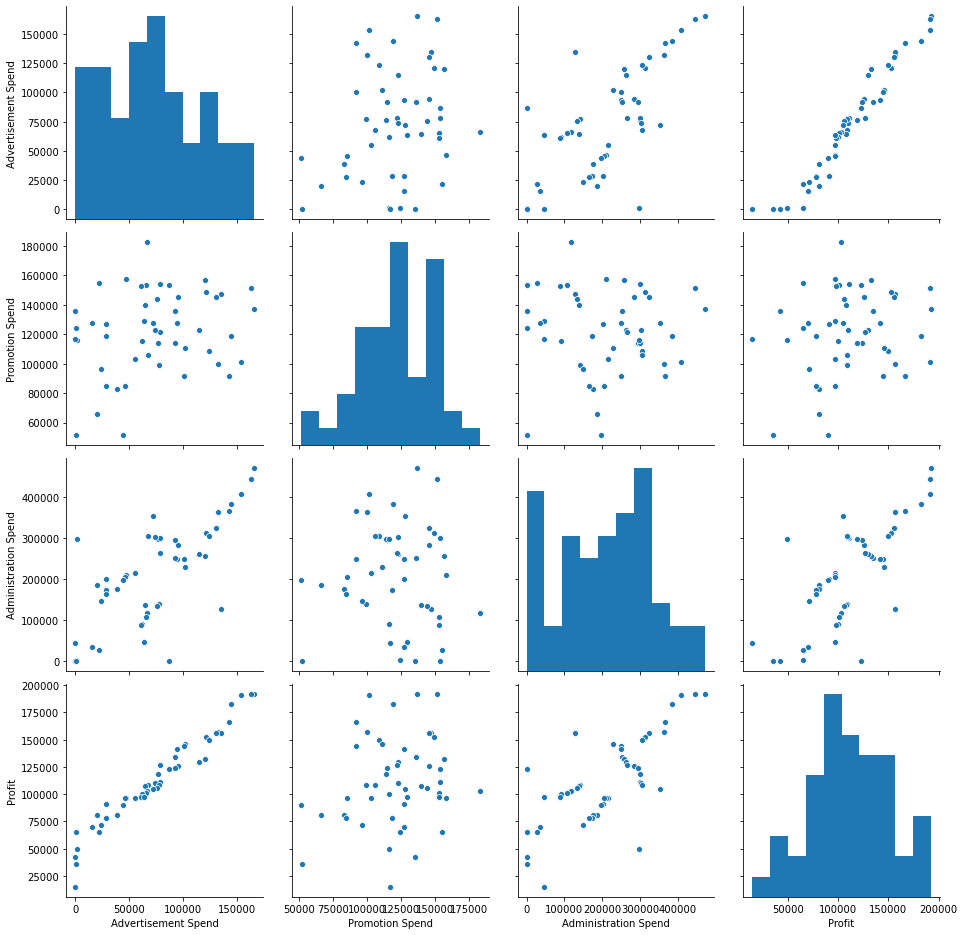

In [6]:
#Pair plot to know the correlation
sns.pairplot(data_branches)
fig=plt.gcf()
fig.set_size_inches(13,13)

In [7]:
# Getting the list of categories in categorical variable(State)
cat_state=list(data_branches['State'].value_counts().index)
print(cat_state)

['New York', 'California', 'Florida']


In [8]:
# Data segregation on the basis of State
California=[]
NewYork=[]
Florida= []

for i in range(len(data_branches)):
    if data_branches["State"][i]== cat_state[0]:
        California.append(i) #(i) because builtin_function_or_method' object is not subscriptable
        
    elif data_branches["State"][i]==cat_state[1]:
        NewYork.append(i) #(i) because builtin_function_or_method' object is not subscriptable
        
    elif data_branches["State"][i]==cat_state[2]:
        Florida.append(i) #(i) because builtin_function_or_method' object is not subscriptable
        
# Defining a function to make dataframe with speific index of data        
def sep_data(data_list):
    combined_csv = pd.concat([pd.read_csv('../input/marketing-data-for-a-supermarket-in-united-states/supermarket_marketing/50_SupermarketBranches.csv', skiprows= i+1, nrows=1, header=None) for i in data_list])
    combined_csv= combined_csv.set_index(i for i in range(len(data_list)))
    combined_csv.columns = data_branches.columns
    return combined_csv

# Data containing only California
data_cal= sep_data(California)

# Data containing only New York
data_new= sep_data(NewYork)

# Data containing only Florida
data_flo= sep_data(Florida)

# Displaying datas
print("Data for California:")
display(data_cal)

print("Data for New York:")
display(data_new)

print("Data for Florida:")
display(data_flo)

Data for California:


,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,144372.41,118671.85,383199.62,New York,182901.99
2,131876.90,99814.71,362861.36,New York,156991.12
3,120542.52,148718.95,311613.29,New York,152211.77
4,114523.61,122616.84,261776.23,New York,129917.04
5,94657.16,145077.58,282574.31,New York,125370.37
6,86419.70,153514.11,0.00,New York,122776.86
7,78389.47,153773.43,299737.29,New York,111313.02
8,77044.01,99281.34,140574.81,New York,108552.04
9,72107.60,127864.55,353183.81,New York,105008.31


Data for New York:


,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,162597.70,151377.59,443898.53,California,191792.06
1,134615.46,147198.87,127716.82,California,156122.51
2,123334.88,108679.17,304981.62,California,149759.96
3,100671.96,91790.61,249744.55,California,144259.40
4,91992.39,135495.07,252664.93,California,134307.35
5,78013.11,121597.55,264346.06,California,126992.93
6,76253.86,113867.30,298664.47,California,118474.03
7,64664.71,139553.16,137962.62,California,107404.34
8,63408.86,129219.61,46085.25,California,97427.84
9,46426.07,157693.92,210797.67,California,96712.80


Data for Florida:


,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,153441.51,101145.55,407934.54,Florida,191050.39
1,142107.34,91391.77,366168.42,Florida,166187.94
2,130298.13,145530.06,323876.68,Florida,155752.60
3,101913.08,110594.11,229160.95,Florida,146121.95
4,93863.75,127320.38,249839.44,Florida,141585.52
5,119943.24,156547.42,256512.92,Florida,132602.65
6,91749.16,114175.79,294919.57,Florida,124266.90
7,73994.56,122782.75,303319.26,Florida,110352.25
8,67532.53,105751.03,304768.73,Florida,108733.99
9,75328.87,144135.98,134050.07,Florida,105733.54


So now we have 3 data frames for 3 States

# For California 

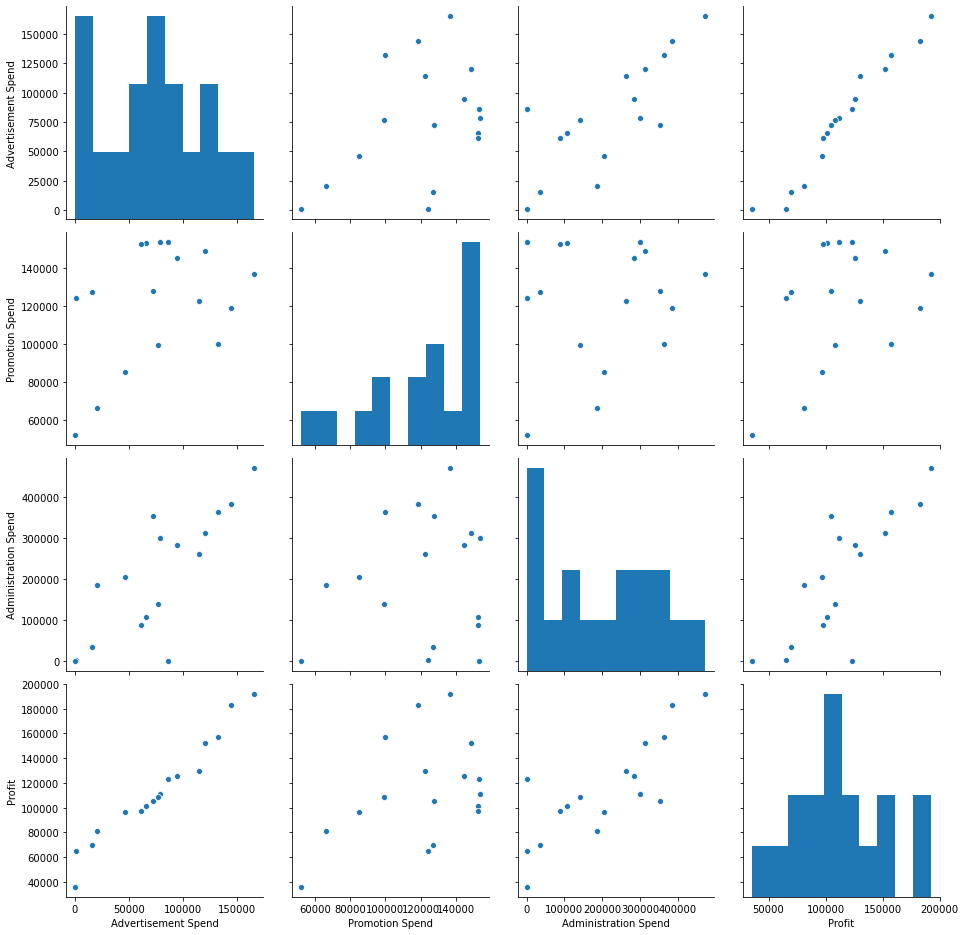

In [9]:
#Pair plot to know the correlation
sns.pairplot(data_cal)
fig=plt.gcf()
fig.set_size_inches(13,13)

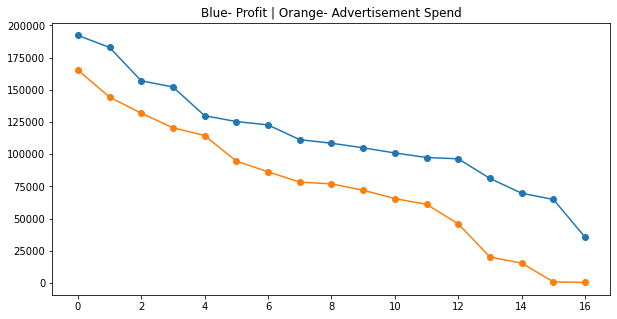

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data_cal['Profit'], '-o')
plt.plot(data_cal['Advertisement Spend'], '-o')


plt.title("Blue- Profit | Orange- Advertisement Spend")
plt.show()

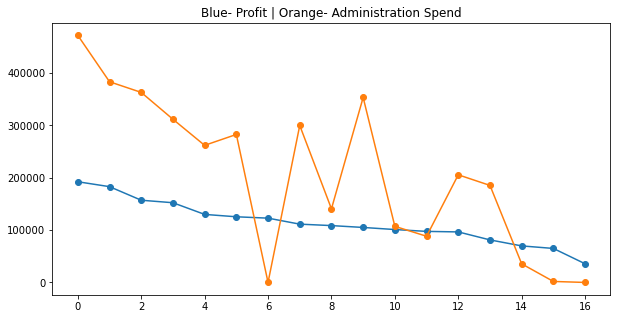

In [13]:
plt.figure(figsize=(10,5))
plt.plot(data_cal['Profit'], '-o')
plt.plot(data_cal['Administration Spend'], '-o')


plt.title("Blue- Profit | Orange- Administration Spend")
plt.show()

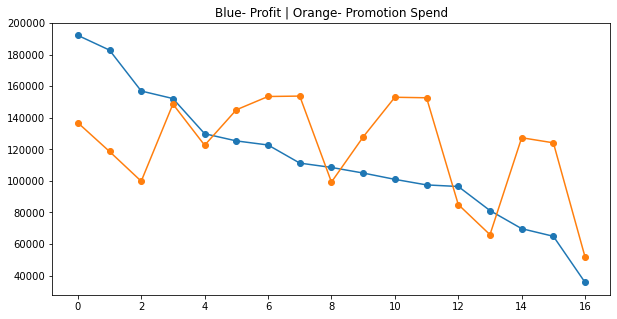

In [14]:
plt.figure(figsize=(10,5))
plt.plot(data_cal['Profit'], '-o')
plt.plot(data_cal['Promotion Spend'], '-o')


plt.title("Blue- Profit | Orange- Promotion Spend")
plt.show()

# For New York 

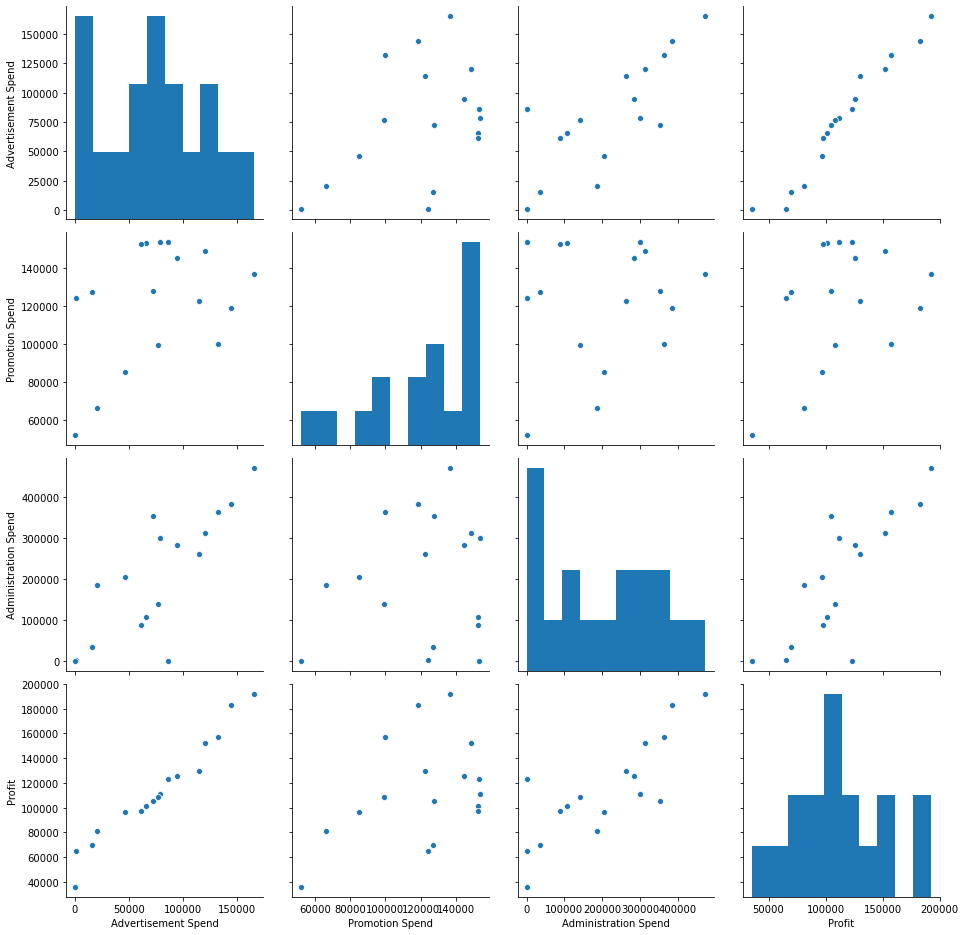

In [43]:
#Pair plot to know the correlation
sns.pairplot(data_new)
fig=plt.gcf()
fig.set_size_inches(13,13)

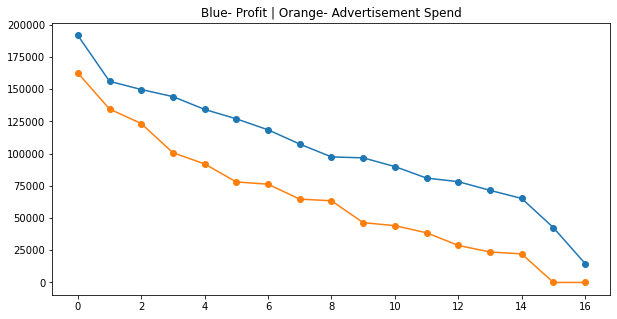

In [15]:
plt.figure(figsize=(10,5))
plt.plot(data_new['Profit'], '-o')
plt.plot(data_new['Advertisement Spend'], '-o')


plt.title("Blue- Profit | Orange- Advertisement Spend")
plt.show()

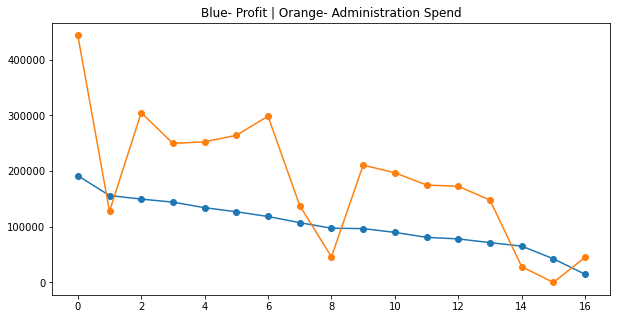

In [16]:
plt.figure(figsize=(10,5))
plt.plot(data_new['Profit'], '-o')
plt.plot(data_new['Administration Spend'], '-o')


plt.title("Blue- Profit | Orange- Administration Spend")
plt.show()

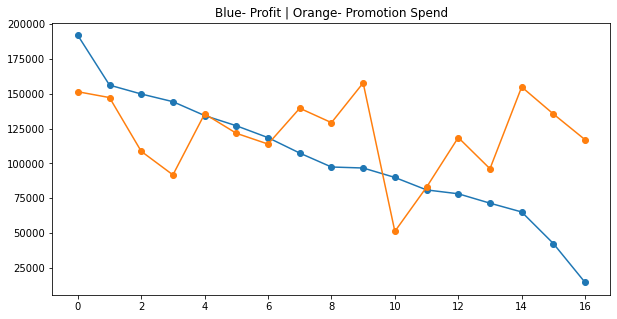

In [17]:
plt.figure(figsize=(10,5))
plt.plot(data_new['Profit'], '-o')
plt.plot(data_new['Promotion Spend'], '-o')


plt.title("Blue- Profit | Orange- Promotion Spend")
plt.show()

# For Florida 

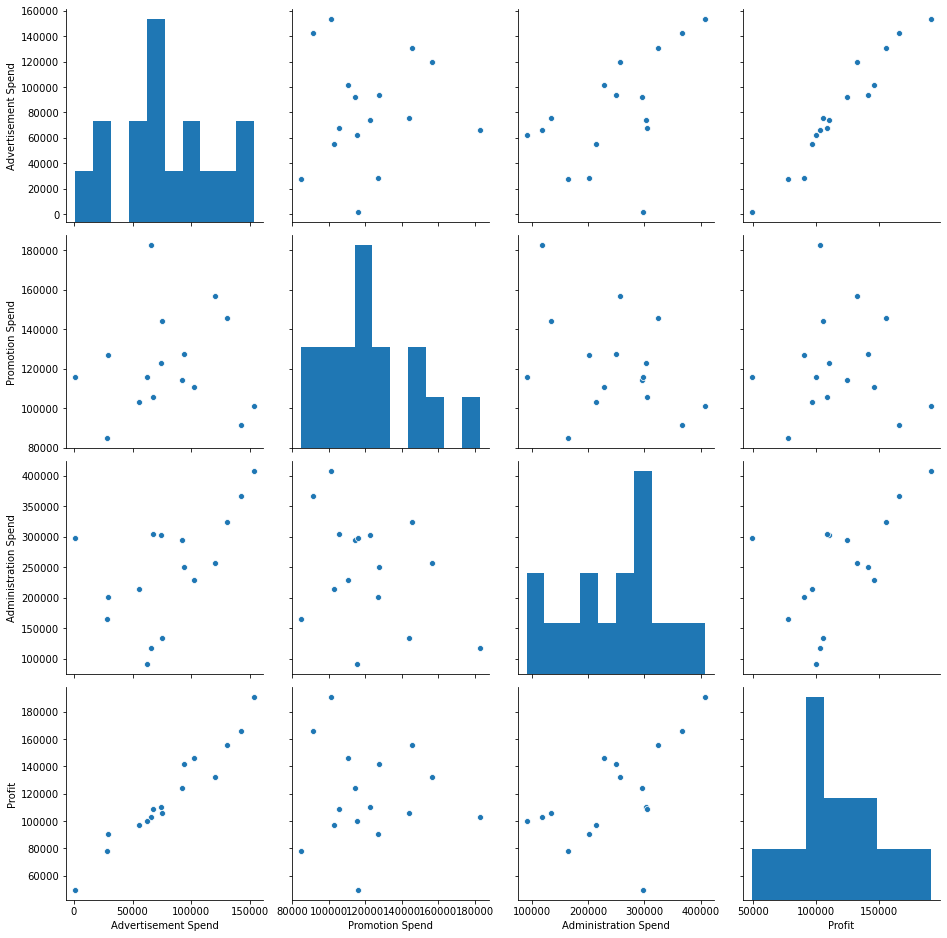

In [47]:
#Pair plot to know the correlation
sns.pairplot(data_flo)
fig=plt.gcf()
fig.set_size_inches(13,13)

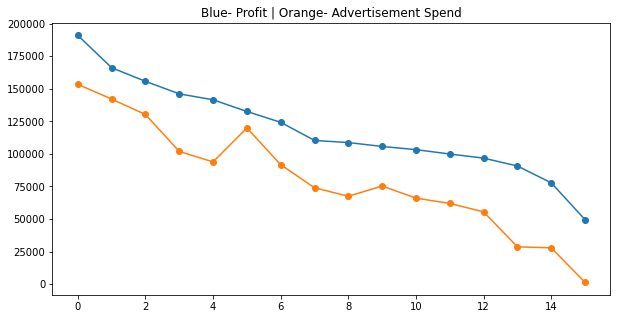

In [18]:
plt.figure(figsize=(10,5))
plt.plot(data_flo['Profit'], '-o')
plt.plot(data_flo['Advertisement Spend'], '-o')


plt.title("Blue- Profit | Orange- Advertisement Spend")
plt.show()

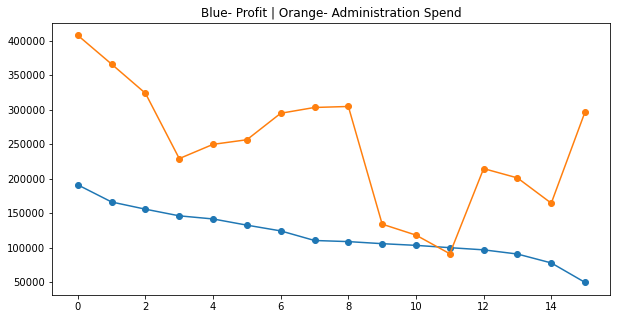

In [19]:
plt.figure(figsize=(10,5))
plt.plot(data_flo['Profit'], '-o')
plt.plot(data_flo['Administration Spend'], '-o')


plt.title("Blue- Profit | Orange- Administration Spend")
plt.show()

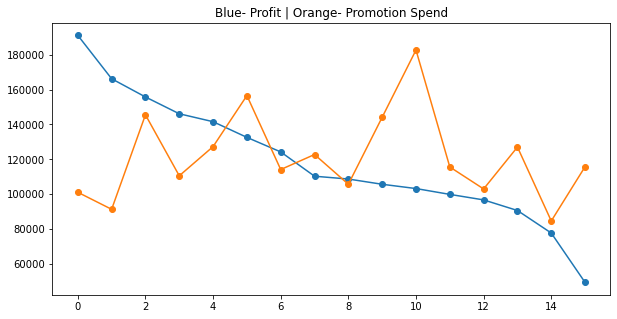

In [20]:
plt.figure(figsize=(10,5))
plt.plot(data_flo['Profit'], '-o')
plt.plot(data_flo['Promotion Spend'], '-o')


plt.title("Blue- Profit | Orange- Promotion Spend")
plt.show()